In [15]:
import numpy as np
import re
from sklearn import svm, metrics
from skimage import io, feature, filters, exposure, color

# MY IMPORTS:
from skimage.feature import hog

In [241]:
class ImageClassifier:
    
    def __init__(self):
        self.classifer = None

    def imread_convert(self, f):
        return io.imread(f).astype(np.uint8)

    def load_data_from_folder(self, dir):
        # read all images into an image collection
        ic = io.ImageCollection(dir+"*.bmp", load_func=self.imread_convert)
        
        #create one large array of image data
        data = io.concatenate_images(ic)
        
        #extract labels from image names
        labels = np.array(ic.files)
        for i, f in enumerate(labels):
            m = re.search("_", f)
            labels[i] = f[len(dir):m.start()]
        
        return(data,labels)
    
    def extract_image_features(self, data):
        # Please do not modify the header above

        # extract feature vector from image data

        ######################## YOUR CODE HERE ########################
        feature_data = np.zeros([data.shape[0], data.shape[1] * data.shape[2]])
        i = 0
        for image in data:
            # For the current image we run skimage.feature.hog; returns a HOG descriptor of the image, and a visualization of the HOG image.
            fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    
            # Stretches and shrinks intensity leves to given range.
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
            # We reshape the 2D array for that image into a 1D array, that way we can train the SVM with a 2D array
            hog_image_rescaled_flat = np.reshape(hog_image_rescaled, (np.product(hog_image_rescaled.shape),))
    
            feature_data[i] = hog_image_rescaled_flat
        
            i = i + 1
        
        # Please do not modify the return type below
        return(feature_data)
    
    def train_classifier(self, train_data, train_labels):
        # Please do not modify the header above
        
        # train model and save the trained model to self.classifier
        
        ######################## YOUR CODE HERE ########################
        
        clf = svm.SVC(kernel='linear')
        clf.fit(train_data, train_labels)

        self.classifer = clf
        
    def predict_labels(self, data):
        # Please do not modify the header

        # predict labels of test data using trained model in self.classifier
        # the code below expects output to be stored in predicted_labels
        
        ######################## YOUR CODE HERE ########################

        clf = self.classifer
        predicted_labels = clf.predict(data)

        # Please do not modify the return type below
        return predicted_labels

In [223]:
img_clf = ImageClassifier()

# load images
(train_raw, train_labels) = img_clf.load_data_from_folder('./train/')
(test_raw, test_labels) = img_clf.load_data_from_folder('./test/')

print(train_raw.shape)
print(train_labels.shape)
print(test_raw.shape)
print(test_labels.shape)

(196, 240, 320, 3)
(196,)
(40, 240, 320, 3)
(40,)


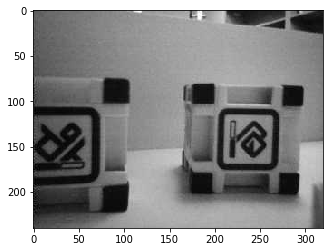

In [224]:
import matplotlib.pyplot as plt
plt.imshow(train_raw[100])

### First Method to Complete (extract_image_features)

(240, 320, 3)

c:\python36\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


Text(0.5,1,'Rescaled image')

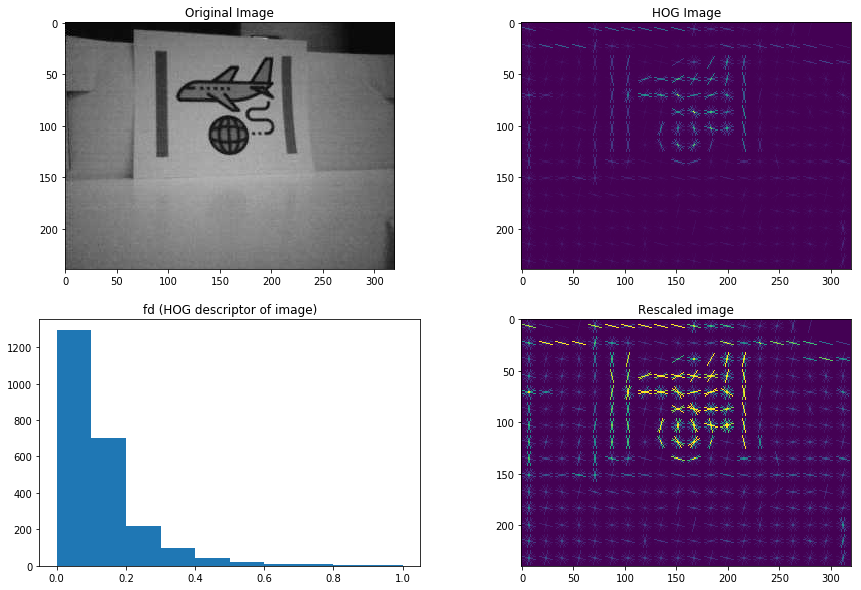

In [257]:
data = train_raw

image_1 = data[150]

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

ax1.imshow(image_1); ax1.set_title("Original Image")

fd_1, hog_image_1 = hog(image_1, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)

ax2.imshow(hog_image_1); ax2.set_title("HOG Image")
ax3.hist(fd_1); ax3.set_title("fd (HOG descriptor of image)")

hog_image_1_rescaled = exposure.rescale_intensity(hog_image_1, in_range=(0, 10))

ax4.imshow(hog_image_1_rescaled); ax4.set_title("Rescaled image")

### Second Method to Complete (train_classifier)

In [234]:
img_clf = ImageClassifier()

# load images
(train_raw, train_labels) = img_clf.load_data_from_folder('./train/')
(test_raw, test_labels) = img_clf.load_data_from_folder('./test/')

train_data = img_clf.extract_image_features(train_raw)
test_data = img_clf.extract_image_features(test_raw)

# SECOND METHOD CONTENT:
clf = svm.SVC(kernel='linear')
clf.fit(train_data, train_labels)

c:\python36\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Third Method to Complete (predict_labels)

In [239]:
# Literally just this:
predicted_labels = clf.predict(train_data)

## Testing Different SVM Kernels

In [258]:
img_clf = ImageClassifier()

# load images
(train_raw, train_labels) = img_clf.load_data_from_folder('./train/')
(test_raw, test_labels) = img_clf.load_data_from_folder('./test/')

# convert images into features
train_data = img_clf.extract_image_features(train_raw)
test_data = img_clf.extract_image_features(test_raw)

# train model and test on training data
img_clf.train_classifier(train_data, train_labels)
predicted_labels = img_clf.predict_labels(train_data)

# test model
predicted_labels = img_clf.predict_labels(test_data)

c:\python36\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [245]:
# Testing different Kernels
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(train_data, train_labels)
print("Linear Training Accuracy: {score}".format(score=round(clf_linear.score(train_data, train_labels), 5)))
print("Linear Testing Accuracy: {score}".format(score=round(clf_linear.score(test_data, test_labels), 5)))

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(train_data, train_labels)
print("RBF Training Accuracy: {score}".format(score=round(clf_rbf.score(train_data, train_labels), 5)))
print("RBF Testing Accuracy: {score}".format(score=round(clf_rbf.score(test_data, test_labels), 5)))

Linear Training Accuracy: 1.0
Linear Testing Accuracy: 0.95
RBF Training Accuracy: 0.20408
RBF Testing Accuracy: 0.125


In [247]:
clf_quadratic = svm.SVC(kernel='poly', degree=2)
clf_quadratic.fit(train_data, train_labels)
print("Quadratic Training Accuracy: {score}".format(score=round(clf_quadratic.score(train_data, train_labels), 5)))
print("Quadratic Testing Accuracy: {score}".format(score=round(clf_quadratic.score(test_data, test_labels), 5)))

clf_cubic = svm.SVC(kernel='poly', degree=3)
clf_cubic.fit(train_data, train_labels)
print("Cubic Training Accuracy: {score}".format(score=round(clf_cubic.score(train_data, train_labels), 5)))
print("Cubic Testing Accuracy: {score}".format(score=round(clf_cubic.score(test_data, test_labels), 5)))

Quadratic Training Accuracy: 0.20408
Quadratic Testing Accuracy: 0.125
Cubic Training Accuracy: 0.20408
Cubic Testing Accuracy: 0.125


## Testing Histogram Normalization & Gaussian Filtering

Made things worse, not gonna bother including the code

## Testing Edge Detection

I tried running edge detection instead of HOG to see the result. If you replace extract_image_features with the function below you get a training accuracy of 100% but a testing accuracy of 90%.

In [ ]:
def extract_image_features(self, data):
    # Please do not modify the header above

    # extract feature vector from image data

    ######################## YOUR CODE HERE ########################
    feature_data = np.zeros([data.shape[0], data.shape[1] * data.shape[2]])
    i = 0
    for image in data:
        """
        # For the current image we run skimage.feature.hog; returns a HOG descriptor of the image, and a visualization of the HOG image.
        fd, hog_image = hog(image, orientations=32, pixels_per_cell=(64, 64), cells_per_block=(1, 1), visualize=True, multichannel=True)

        # Stretches and shrinks intensity leves to given range.
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # We reshape the 2D array for that image into a 1D array, that way we can train the SVM with a 2D array
        hog_image_rescaled_flat = np.reshape(hog_image_rescaled, (np.product(hog_image_rescaled.shape),))

        feature_data[i] = hog_image_rescaled_flat
        """

        from skimage import color
        image = color.rgb2gray(image)
        image = filters.prewitt(image)

        feature_data[i] = np.reshape(image, (np.product(image.shape) ,))

        i = i + 1

    # Please do not modify the return type below
    return(feature_data)